## Programming exercises

### 7.1 K-nearest neighbor classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#### synth1 data

In [16]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('synth1.mat')
X = np.matrix(mat_data['X'])
X_train = np.matrix(mat_data['X_train'])
X_test = np.matrix(mat_data['X_test'])
y = np.matrix(mat_data['y'])
y_train = np.matrix(mat_data['y_train'])
y_test = np.matrix(mat_data['y_test'])
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

df=pd.DataFrame(X).set_axis(attributeNames,axis=1,inplace=False)
df["y"]=y
print(df["y"].value_counts()) 
df.head()


3    50
2    50
1    50
0    50
Name: y, dtype: int64


,Attribute A,Attribute B,y
0,0.418193,0.725060,0
1,1.160776,1.253722,0
2,0.991951,0.573326,0
3,1.059111,1.143922,0
4,0.866616,1.143537,0


**Different methods for plotting:**

In [3]:
#### Method 1 ####

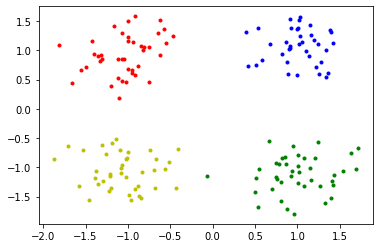

In [7]:
# Plot the training data points (color-coded) and test data points.
styles = ['.b', '.r', '.g', '.y']
for c in range(C):
    class_mask = (y_train==c).A.ravel()
    plt.plot(X_train[class_mask,0].A, X_train[class_mask,1].A, styles[c])

In [115]:
#### Method 2 ####

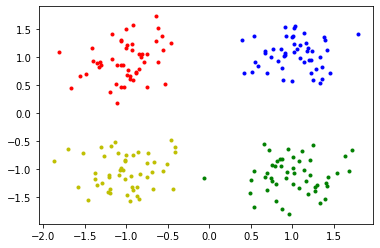

In [8]:
styles = ['b', 'r', 'g', 'y']
for c in range(4):
    DF=df[df["y"]==c]
    plt.plot(DF.iloc[:,[0]],DF.iloc[:,[1]],".",color=styles[c]);

In [ ]:
#### Method 3 ####

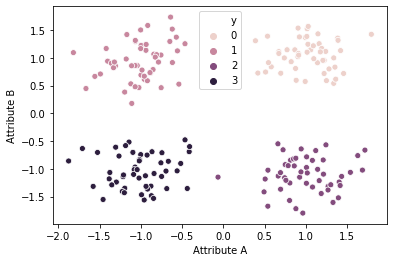

In [9]:
import seaborn as sn
sn.scatterplot("Attribute A","Attribute B",hue="y",data=df);

In [10]:
# K-nearest neighbors
K=5

# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist=2

# Fit classifier and classify the test points
knclassifier = KNeighborsClassifier(n_neighbors=K, p=dist);
knclassifier.fit(X_train, np.array(y_train).flatten());
y_est = knclassifier.predict(X_test);

In [11]:
Td=pd.DataFrame(X_test).set_axis(attributeNames,axis=1,inplace=False)
Td["y"]=y_test
Td["y_est"]=y_est
Td.head()

,Attribute A,Attribute B,y,y_est
0,1.222934,0.954613,0,0
1,1.175655,1.106013,0,0
2,0.695806,0.721957,0,0
3,0.739104,0.997162,0,0
4,1.457450,0.717841,0,0


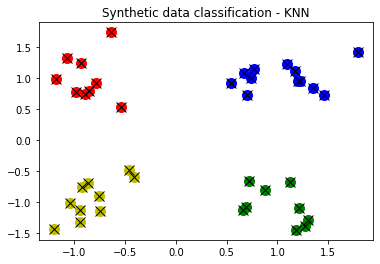

In [12]:
# Plot the classfication results
styles = ['b', 'r', 'g', 'y']
for c in range(C):
    dat=Td[Td["y"]==c]
    dat_es=Td[Td["y_est"]==c]
    plt.plot(dat.iloc[:,[0]],dat.iloc[:,[1]],"o",color=styles[c],markersize=10)
    plt.plot(dat_es.iloc[:,[0]],dat_es.iloc[:,[1]],'kx',markersize=10)
plt.title('Synthetic data classification - KNN');    
    
    


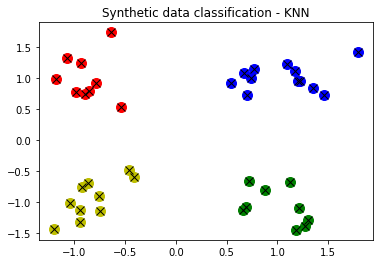

In [13]:
# Plot the classfication results
styles = ['ob', 'or', 'og', 'oy']
for c in range(C):
    class_mask = (y_est==c)
    plt.plot(X_test[class_mask,0].A, X_test[class_mask,1].A, styles[c], markersize=10)
    plt.plot(X_test[class_mask,0].A, X_test[class_mask,1].A, 'kx', markersize=8)
plt.title('Synthetic data classification - KNN');



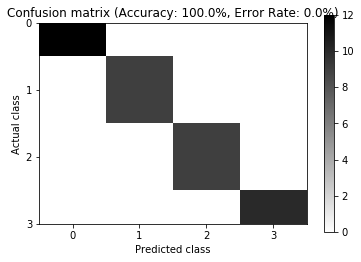

In [14]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_est);
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;

plt.imshow(cm, cmap='binary', interpolation='None');
plt.colorbar()
plt.xticks(range(C)); plt.yticks(range(C));
plt.xlabel('Predicted class'); plt.ylabel('Actual class');
plt.title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

plt.show()

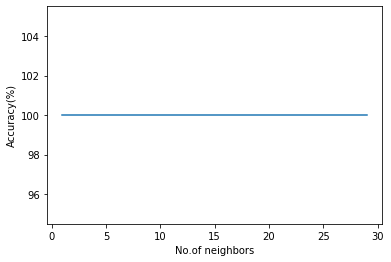

In [15]:
# K-nearest neighbors
K=range(1,30)
# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist=1
accuracy=[]
error_rate=[]
for k in K:
    # Fit classifier and classify the test points
    knclassifier = KNeighborsClassifier(n_neighbors=k, p=dist);
    knclassifier.fit(X_train, np.array(y_train).flatten());
    y_est = knclassifier.predict(X_test);
    cm = confusion_matrix(y_test, y_est);
    acc = 100*cm.diagonal().sum()/cm.sum();
    accuracy.append(acc)
    err = 100-acc
    error_rate.append(err);
    
plt.plot(K,accuracy)
plt.ylabel("Accuracy(%)")
plt.xlabel("No.of neighbors");

#### Iris data

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

In [18]:
df=pd.read_csv("iris.csv")
df.head()
X=df.drop("Type",axis=1)
y=df["Type"]

In [19]:
X=np.array(X)
y=np.array(y)

In [20]:
K = range(1,41)
error_lists = [[] for _ in range(len(K))]
dist=1
CV=LeaveOneOut()
for train_index, test_index in CV.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for k in K:        
    # Fit classifier and classify the test points
        knclassifier = KNeighborsClassifier(n_neighbors=k, p=dist)
        knclassifier.fit(X_train, np.array(y_train).flatten())
        y_est = knclassifier.predict(X_test)
        if y_est[0]==y_test[0]:
            error_lists[k-1].append(0)
        else:
            error_lists[k-1].append(100)    

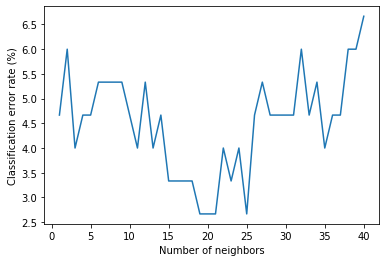

In [21]:
mean_error=[]
for lst in error_lists:
    mean_error.append(np.mean(lst))
    
plt.plot(range(1,41), mean_error)
plt.xlabel('Number of neighbors')
plt.ylabel('Classification error rate (%)');

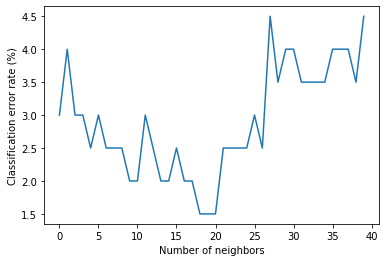

In [23]:
# Maximum number of neighbors
L=40

CV = LeaveOneOut()
errors = np.zeros((N,L))
i=0
for train_index, test_index in CV.split(X):
    # print('Crossvalidation fold: {0}/{1}'.format(i+1,N))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    # Fit classifier and classify the test points (consider 1 to 40 neighbors)
    for l in range(1,L+1):
        knclassifier = KNeighborsClassifier(n_neighbors=l);
        knclassifier.fit(X_train, np.array(y_train).flatten());
        y_est = knclassifier.predict(X_test);
        errors[i,l-1] = np.sum(y_est[0]!=y_test[0])

    i+=1
    
# Plot the classification error rate

plt.plot(100*sum(errors,0)/N)
plt.xlabel('Number of neighbors')
plt.ylabel('Classification error rate (%)');


### 7.2 Naiive Bayes

In [24]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# Load list of names from files
fmale = open('male.txt','r')
ffemale = open('female.txt','r')
mnames = fmale.readlines(); fnames = ffemale.readlines();
names = mnames + fnames
gender = [0]*len(mnames) + [1]*len(fnames)
fmale.close(); ffemale.close();

In [25]:
# Extract X, y and the rest of variables. Include only names of >4 characters.
X = np.mat(np.zeros((len(names),4)))
y = np.mat(np.zeros((len(names),1)))
n=0
for i in range(0,len(names)):
    name = names[i].strip().lower()
    if len(name)>3:
        X[n,:] = [ord(name[0])-ord('a')+1, ord(name[1])-ord('a')+1, ord(name[-2])-ord('a')+1, ord(name[-1])-ord('a')+1]
        y[n,0] = gender[i]
        n+=1
X = X[0:n,:]; y = y[0:n,:];

N, M = X.shape; C = 2
attributeNames = ['1st letter', '2nd letter', 'Next-to-last letter', 'Last letter']
classNames = ['Female', 'Male'];

In [26]:
# Naive Bayes classifier parameters
alpha = 1.0         # additive parameter (e.g. Laplace correction)
est_prior = True   # uniform prior (change to True to estimate prior from data)

# K-fold crossvalidation
K = 10
CV = KFold(K,shuffle=True)

errors = np.zeros(K)
k=0
for train_index, test_index in CV.split(X):
    print('Crossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index,:]
    X_test = X[test_index,:]
    y_test = y[test_index,:]
    
    nb_classifier = MultinomialNB(alpha=alpha, fit_prior=est_prior)
    nb_classifier.fit(X_train, np.array(y_train).flatten())
    y_est_prob = nb_classifier.predict_proba(X_test)
    y_est = np.argmax(y_est_prob,1)
    
    errors[k] = np.sum(y_est.ravel()!=y_test.ravel(),dtype=float)/y_test.shape[0]
    k+=1
    
# Plot the classification error rate
print('Error rate: {0}%'.format(100*np.mean(errors)))

Crossvalidation fold: 1/10
Crossvalidation fold: 2/10
Crossvalidation fold: 3/10
Crossvalidation fold: 4/10
Crossvalidation fold: 5/10
Crossvalidation fold: 6/10
Crossvalidation fold: 7/10
Crossvalidation fold: 8/10
Crossvalidation fold: 9/10
Crossvalidation fold: 10/10
Error rate: 29.90487892284851%
